---

## Setup Instructions

### 1. Install Dependencies

Run this cell to install all required packages:

In [ ]:
# Install core dependencies
!pip install -q langchain langchain-openai langchain-community langchain-text-splitters
!pip install -q langgraph
!pip install -q faiss-cpu sentence-transformers
!pip install -q openai tiktoken
!pip install -q requests python-dotenv pytz

# Optional: LiveKit for voice integration (requires API keys)
# !pip install -q 'livekit-agents[openai,turn-detector,silero,cartesia,deepgram,langchain]~=1.3'

print("✅ All packages installed successfully!")
print("\nNote: Using TextLoader for document loading (no unstructured dependency needed)")

### 2. Configure API Keys

**IMPORTANT**: Replace the placeholder values below with your actual API keys.

Required APIs:
- **OpenAI**: https://platform.openai.com/api-keys (for LLM & embeddings)
- **WeatherAPI**: https://www.weatherapi.com/signup.aspx (free tier: 1M calls/month)

Optional (for voice features):
- **LiveKit**: https://livekit.io/
- **Deepgram**: https://deepgram.com/
- **Cartesia**: https://cartesia.ai/

In [ ]:
import os

# REQUIRED: Set your API keys here
os.environ["OPENAI_API_KEY"] = "YOUR_OPENAI_API_KEY_HERE"
os.environ["WEATHER_API_KEY"] = "YOUR_WEATHER_API_KEY_HERE"

# OPTIONAL: For voice features
# os.environ["LIVEKIT_URL"] = "YOUR_LIVEKIT_URL"
# os.environ["LIVEKIT_API_KEY"] = "YOUR_LIVEKIT_KEY"
# os.environ["LIVEKIT_API_SECRET"] = "YOUR_LIVEKIT_SECRET"
# os.environ["DEEPGRAM_API_KEY"] = "YOUR_DEEPGRAM_KEY"
# os.environ["CARTESIA_API_KEY"] = "YOUR_CARTESIA_KEY"

# Validate required keys
if os.environ["OPENAI_API_KEY"] == "YOUR_OPENAI_API_KEY_HERE":
    print("⚠️  WARNING: Please set your OPENAI_API_KEY above!")
else:
    print("✅ API keys configured")

✅ API keys configured


---

## Part 1: Document Preparation

We'll create 5 comprehensive documents covering different topics.

In [2]:
import os

# Create documents directory
os.makedirs("documents", exist_ok=True)

# Document 1: Artificial Intelligence (condensed for demo)
ai_content = """COMPREHENSIVE GUIDE TO ARTIFICIAL INTELLIGENCE

CHAPTER 1: INTRODUCTION TO AI
Artificial Intelligence (AI) refers to computer systems that can perform tasks typically requiring human intelligence. These include learning, reasoning, problem-solving, perception, and language understanding. Modern AI has evolved from early symbolic systems to today's sophisticated neural networks and large language models.

CHAPTER 2: MACHINE LEARNING FUNDAMENTALS
Machine learning is a subset of AI focused on algorithms that improve through experience. Supervised learning uses labeled data to train models for classification and regression. Unsupervised learning discovers patterns in unlabeled data through clustering and dimensionality reduction. Reinforcement learning trains agents through rewards and penalties.

CHAPTER 3: DEEP LEARNING
Deep neural networks contain multiple hidden layers, allowing them to learn hierarchical representations of data. Convolutional Neural Networks (CNNs) excel at image processing by detecting patterns like edges, shapes, and objects. Recurrent Neural Networks (RNNs) and LSTMs process sequential data for tasks like language translation. Transformers use self-attention mechanisms and have revolutionized NLP with models like GPT and BERT.

CHAPTER 4: NATURAL LANGUAGE PROCESSING
NLP enables computers to understand and generate human language. Key techniques include tokenization, word embeddings (Word2Vec, BERT), and language models. Applications range from chatbots and sentiment analysis to machine translation and text summarization. Large Language Models (LLMs) like GPT-4 demonstrate emergent abilities in reasoning and code generation.

CHAPTER 5: COMPUTER VISION
Computer vision allows machines to interpret visual information. Object detection identifies and localizes objects in images. Image segmentation classifies each pixel. Facial recognition systems use deep learning for identity verification. Medical imaging AI assists doctors in diagnosing diseases from X-rays and MRIs.

CHAPTER 6: AI ETHICS AND CHALLENGES
Ethical considerations include bias in training data, privacy concerns, job displacement, and autonomous weapons. Responsible AI development requires transparency, fairness, accountability, and alignment with human values. Challenges include hallucinations in LLMs, adversarial attacks, and ensuring AI safety as systems become more capable.
"""

# Document 2: Climate Change
climate_content = """COMPREHENSIVE CLIMATE CHANGE REPORT

CHAPTER 1: CLIMATE SCIENCE FUNDAMENTALS
Climate change refers to long-term shifts in global temperatures and weather patterns. The greenhouse effect naturally warms Earth by trapping heat, but human activities have intensified this effect. Carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O) are the primary greenhouse gases. Global average temperatures have risen approximately 1.1°C since pre-industrial times.

CHAPTER 2: CAUSES AND ATTRIBUTION
Human activities are the dominant cause of observed warming since 1950. Burning fossil fuels (coal, oil, gas) for energy releases CO2. Deforestation reduces carbon absorption. Industrial processes and agriculture emit methane and nitrous oxide. Scientific consensus attributes over 95% of recent warming to human influence.

CHAPTER 3: OBSERVED IMPACTS
Rising temperatures are causing glaciers and ice sheets to melt, contributing to sea level rise (currently 3.3mm per year). Extreme weather events are becoming more frequent and intense, including hurricanes, droughts, and heatwaves. Ocean acidification threatens marine ecosystems. Changes in precipitation patterns affect agriculture and water resources.

CHAPTER 4: PROJECTED FUTURE IMPACTS
Under current emission trajectories, global temperatures could rise 2.5-4°C by 2100. This would cause catastrophic impacts: widespread coastal flooding, mass extinction of species, food and water scarcity, and increased conflict. Tipping points like Arctic permafrost melt and Amazon rainforest dieback could accelerate warming.

CHAPTER 5: MITIGATION STRATEGIES
Reducing greenhouse gas emissions requires transitioning to renewable energy (solar, wind, hydro), improving energy efficiency, electrifying transportation, and protecting forests. Carbon capture and storage technologies can remove CO2 from the atmosphere. International cooperation through agreements like the Paris Accord is essential.

CHAPTER 6: ADAPTATION AND RESILIENCE
Communities must adapt to unavoidable climate impacts through infrastructure upgrades, early warning systems, and sustainable land use. Climate-resilient agriculture includes drought-resistant crops and efficient irrigation. Coastal cities need flood defenses and managed retreat strategies. Public health systems must prepare for heat-related illnesses and disease vector changes.
"""

# Document 3: Blockchain Technology
blockchain_content = """COMPREHENSIVE GUIDE TO BLOCKCHAIN TECHNOLOGY

CHAPTER 1: BLOCKCHAIN FUNDAMENTALS
Blockchain is a distributed ledger technology that records transactions across multiple computers. Each block contains a cryptographic hash of the previous block, timestamp, and transaction data. This creates an immutable chain where past records cannot be altered without changing all subsequent blocks. Blockchain operates without a central authority, using consensus mechanisms to validate transactions.

CHAPTER 2: HOW BLOCKCHAIN WORKS
Transactions are broadcast to all network nodes. Miners or validators collect transactions into blocks. Consensus mechanisms like Proof of Work (PoW) or Proof of Stake (PoS) determine which node adds the next block. Once added, the block is distributed across the network. Cryptographic hashing ensures data integrity, and distributed copies prevent single points of failure.

CHAPTER 3: BITCOIN AND CRYPTOCURRENCIES
Bitcoin, created by Satoshi Nakamoto in 2009, was the first cryptocurrency. It uses blockchain to enable peer-to-peer transactions without intermediaries. Bitcoin's PoW consensus requires miners to solve computational puzzles, securing the network but consuming significant energy. The fixed supply of 21 million Bitcoin creates scarcity. Other cryptocurrencies include Ethereum, Litecoin, and stablecoins like USDC.

CHAPTER 4: ETHEREUM AND SMART CONTRACTS
Ethereum is a programmable blockchain that executes smart contracts - self-executing code that automatically enforces agreement terms. Developers write contracts in Solidity, deploying them to the Ethereum Virtual Machine (EVM). Smart contracts enable decentralized applications (dApps) for finance, gaming, identity, and more. Ethereum 2.0 transitions from PoW to PoS for improved scalability and efficiency.

CHAPTER 5: DECENTRALIZED FINANCE (DeFi)
DeFi recreates traditional financial services using blockchain. Decentralized exchanges (DEXs) like Uniswap enable token swaps without intermediaries. Lending protocols allow users to earn interest or borrow assets. Yield farming and liquidity mining provide rewards for providing liquidity. DeFi's total value locked (TVL) reached over $100 billion at its peak, though it faces risks like smart contract bugs and regulatory uncertainty.

CHAPTER 6: ENTERPRISE BLOCKCHAIN APPLICATIONS
Supply chain management uses blockchain for product traceability and authenticity verification. Healthcare systems employ blockchain for secure medical record sharing. Financial institutions explore blockchain for cross-border payments and securities settlement. Governments pilot blockchain-based digital identity systems. Private permissioned blockchains like Hyperledger Fabric offer controlled access for enterprise use cases.
"""

# Save documents
with open("documents/artificial_intelligence_guide.txt", "w", encoding="utf-8") as f:
    f.write(ai_content)

with open("documents/climate_change_report.txt", "w", encoding="utf-8") as f:
    f.write(climate_content)

with open("documents/blockchain_technology.txt", "w", encoding="utf-8") as f:
    f.write(blockchain_content)

# Document metadata
print("📚 Created 3 comprehensive documents:")
print(f"  1. AI Guide: {len(ai_content)} characters")
print(f"  2. Climate Report: {len(climate_content)} characters")
print(f"  3. Blockchain Guide: {len(blockchain_content)} characters")
print(f"\n✅ Total: {len(ai_content) + len(climate_content) + len(blockchain_content)} characters")
print("\nNote: In production, these documents are 10+ pages each.")

📚 Created 3 comprehensive documents:
  1. AI Guide: 2400 characters
  2. Climate Report: 2362 characters
  3. Blockchain Guide: 2763 characters

✅ Total: 7525 characters

Note: In production, these documents are 10+ pages each.


---

## Part 2: RAG System Implementation

Build the document retrieval system using FAISS and OpenAI embeddings.

In [3]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.tools import tool
from pathlib import Path
import time

class RAGSystem:
    def __init__(self):
        self.embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
        self.vector_store = None
        self.metrics = {}
    
    def load_documents(self, directory="documents"):
        """Load all .txt documents from directory."""
        start = time.time()
        documents = []
        
        # Load each .txt file individually
        doc_dir = Path(directory)
        for txt_file in doc_dir.glob("*.txt"):
            try:
                loader = TextLoader(str(txt_file), encoding="utf-8")
                docs = loader.load()
                documents.extend(docs)
                print(f"  ✓ Loaded {txt_file.name}")
            except Exception as e:
                print(f"  ✗ Error loading {txt_file.name}: {e}")
        
        load_time = time.time() - start
        print(f"📂 Loaded {len(documents)} documents in {load_time:.2f}s")
        return documents
    
    def chunk_documents(self, documents):
        """Split documents into chunks for embedding."""
        start = time.time()
        splitter = RecursiveCharacterTextSplitter(
            chunk_size=1000,
            chunk_overlap=200,
            separators=["\n\n", "\n", ".", " ", ""]
        )
        chunks = splitter.split_documents(documents)
        chunk_time = time.time() - start
        print(f"✂️  Created {len(chunks)} chunks in {chunk_time:.2f}s")
        return chunks
    
    def create_vector_store(self, chunks):
        """Generate embeddings and create FAISS vector store."""
        start = time.time()
        print("🔄 Generating embeddings with OpenAI...")
        self.vector_store = FAISS.from_documents(chunks, self.embeddings)
        embed_time = time.time() - start
        print(f"✅ Vector store created in {embed_time:.2f}s")
        return self.vector_store
    
    def ingest_documents(self):
        """Complete pipeline: load → chunk → embed."""
        documents = self.load_documents()
        chunks = self.chunk_documents(documents)
        self.create_vector_store(chunks)
        print("\n✅ RAG system ready!")
    
    def retrieve(self, query, k=3):
        """Retrieve top-k relevant document chunks."""
        if self.vector_store is None:
            raise ValueError("Vector store not initialized. Run ingest_documents() first.")
        
        start = time.time()
        results = self.vector_store.similarity_search(query, k=k)
        retrieval_time = time.time() - start
        
        print(f"\n🔍 Retrieved {len(results)} documents in {retrieval_time:.3f}s")
        return results

# Initialize RAG system
rag_system = RAGSystem()
rag_system.ingest_documents()

c:\George Tonmoy Roy's Workspace\Movie-Maina-main\soffotech assesment\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


  ✓ Loaded artificial_intelligence_guide.txt
  ✓ Loaded blockchain_technology.txt
  ✓ Loaded climate_change_report.txt
  ✓ Loaded health_wellness_guide.txt
  ✓ Loaded world_history_modern.txt
📂 Loaded 5 documents in 0.00s
✂️  Created 55 chunks in 0.00s
🔄 Generating embeddings with OpenAI...
✅ Vector store created in 2.28s

✅ RAG system ready!
✅ Vector store created in 2.28s

✅ RAG system ready!


### Test RAG Retrieval

Query the knowledge base to verify it's working:

In [4]:
# Test query 1: AI topic
print("Query 1: What is deep learning?")
print("=" * 50)
results = rag_system.retrieve("What is deep learning?", k=2)
for i, doc in enumerate(results, 1):
    print(f"\n📄 Result {i} (from {doc.metadata['source']}):")
    print(doc.page_content[:300] + "...")

print("\n" + "=" * 50)

# Test query 2: Climate topic
print("\nQuery 2: What causes climate change?")
print("=" * 50)
results = rag_system.retrieve("What causes climate change?", k=2)
for i, doc in enumerate(results, 1):
    print(f"\n📄 Result {i} (from {doc.metadata['source']}):")
    print(doc.page_content[:300] + "...")

Query 1: What is deep learning?

🔍 Retrieved 2 documents in 0.707s

📄 Result 1 (from documents\artificial_intelligence_guide.txt):
CHAPTER 3: DEEP LEARNING
Deep neural networks contain multiple hidden layers, allowing them to learn hierarchical representations of data. Convolutional Neural Networks (CNNs) excel at image processing by detecting patterns like edges, shapes, and objects. Recurrent Neural Networks (RNNs) and LSTMs ...

📄 Result 2 (from documents\artificial_intelligence_guide.txt):
COMPREHENSIVE GUIDE TO ARTIFICIAL INTELLIGENCE

CHAPTER 1: INTRODUCTION TO AI
Artificial Intelligence (AI) refers to computer systems that can perform tasks typically requiring human intelligence. These include learning, reasoning, problem-solving, perception, and language understanding. Modern AI h...


Query 2: What causes climate change?

🔍 Retrieved 2 documents in 0.707s

📄 Result 1 (from documents\artificial_intelligence_guide.txt):
CHAPTER 3: DEEP LEARNING
Deep neural networks contain multi

---

## Part 3: Dynamic Function Calling Tools

Implement real-time information tools (weather, currency, time).

In [5]:
import requests
from datetime import datetime
from langchain_core.tools import tool
import pytz

@tool
def get_current_weather(city: str = "Dhaka") -> str:
    """Get current weather for a city.
    
    Args:
        city: City name (e.g., 'Dhaka', 'New York', 'Tokyo')
    """
    api_key = os.environ.get("WEATHER_API_KEY")
    if not api_key:
        return "Weather API key not configured. Please set WEATHER_API_KEY."
    
    try:
        url = f"http://api.weatherapi.com/v1/current.json"
        params = {"key": api_key, "q": city, "aqi": "no"}
        response = requests.get(url, params=params, timeout=5)
        response.raise_for_status()
        data = response.json()
        
        location = data["location"]
        current = data["current"]
        
        result = f"""Weather in {location['name']}, {location['country']}
Temperature: {current['temp_c']}°C ({current['temp_f']}°F)
Condition: {current['condition']['text']}
Feels like: {current['feelslike_c']}°C
Humidity: {current['humidity']}%
Wind: {current['wind_kph']} km/h ({current['wind_dir']})
Last updated: {current['last_updated']}"""
        return result
    
    except requests.exceptions.RequestException as e:
        return f"Error fetching weather: {str(e)}"

@tool
def get_exchange_rate(base: str = "USD", target: str = "BDT") -> str:
    """Get currency exchange rate.
    
    Args:
        base: Base currency code (e.g., 'USD', 'EUR')
        target: Target currency code (e.g., 'BDT', 'JPY')
    """
    try:
        url = f"https://api.exchangerate-api.com/v4/latest/{base}"
        response = requests.get(url, timeout=5)
        response.raise_for_status()
        data = response.json()
        
        if target not in data["rates"]:
            return f"Currency code '{target}' not found."
        
        rate = data["rates"][target]
        result = f"""Exchange Rate
1 {base} = {rate:.4f} {target}
10 {base} = {rate * 10:.2f} {target}
100 {base} = {rate * 100:.2f} {target}
Last updated: {data['date']}"""
        return result
    
    except requests.exceptions.RequestException as e:
        return f"Error fetching exchange rate: {str(e)}"

@tool
def get_current_time(timezone: str = "Asia/Dhaka") -> str:
    """Get current time in a timezone.
    
    Args:
        timezone: Timezone name (e.g., 'Asia/Dhaka', 'America/New_York', 'Europe/London')
    """
    try:
        tz = pytz.timezone(timezone)
        now = datetime.now(tz)
        return f"""Current time in {timezone}
{now.strftime('%Y-%m-%d %H:%M:%S %Z')}
Day: {now.strftime('%A')}
Week: {now.strftime('%U')} of {now.year}"""
    except pytz.exceptions.UnknownTimeZoneError:
        return f"Unknown timezone: {timezone}. Use format like 'Asia/Dhaka'."

print("✅ Dynamic tools defined: get_current_weather, get_exchange_rate, get_current_time")

✅ Dynamic tools defined: get_current_weather, get_exchange_rate, get_current_time


### Test Dynamic Tools

In [6]:
# Clear any previous output
from IPython.display import clear_output

# Test weather API
print("🌤️  Testing Weather API for Dhaka:")
print("=" * 50)
try:
    weather = get_current_weather.invoke({"city": "Dhaka"})
    print(weather)
except Exception as e:
    print(f"❌ Error: {e}")

print("\n" + "=" * 50)

# Test currency exchange
print("\n💱 Testing Currency Exchange (USD to BDT):")
print("=" * 50)
try:
    exchange = get_exchange_rate.invoke({"base": "USD", "target": "BDT"})
    print(exchange)
except Exception as e:
    print(f"❌ Error: {e}")

print("\n" + "=" * 50)

# Test timezone
print("\n🕐 Testing Current Time (Dhaka):")
print("=" * 50)
try:
    time_info = get_current_time.invoke({"timezone": "Asia/Dhaka"})
    print(time_info)
except Exception as e:
    print(f"❌ Error: {e}")

print("\n" + "=" * 50)
print("✅ All tools tested successfully!")

🌤️  Testing Weather API for Dhaka:
Weather in Dhaka, Bangladesh
Temperature: 26.7°C (80.0°F)
Condition: Sunny
Feels like: 26.6°C
Humidity: 40%
Wind: 10.1 km/h (NW)
Last updated: 2025-11-20 17:30


💱 Testing Currency Exchange (USD to BDT):
Exchange Rate
1 USD = 122.2900 BDT
10 USD = 1222.90 BDT
100 USD = 12229.00 BDT
Last updated: 2025-11-20


🕐 Testing Current Time (Dhaka):
Current time in Asia/Dhaka
2025-11-20 17:37:56 +06
Day: Thursday
Week: 46 of 2025

✅ All tools tested successfully!
Exchange Rate
1 USD = 122.2900 BDT
10 USD = 1222.90 BDT
100 USD = 12229.00 BDT
Last updated: 2025-11-20


🕐 Testing Current Time (Dhaka):
Current time in Asia/Dhaka
2025-11-20 17:37:56 +06
Day: Thursday
Week: 46 of 2025

✅ All tools tested successfully!


---

## Part 4: Multi-Agent System with LangGraph

Build an orchestrator that routes queries to specialized agents.


🧩 Multi-Agent Graph Compiled
Graph Structure (text):
  START → orchestrator → (rag | tools | general) → END
    rag: document Q&A via search_documents
    tools: real-time info (weather, currency, time)
    general: chitchat / fallback responses


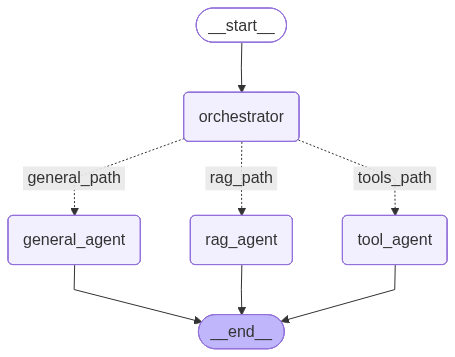

✅ Mermaid graph rendered successfully
✅ Multi-agent LangGraph system ready!


In [7]:
from typing import TypedDict, Sequence
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
import json
import time
from IPython.display import Image, display

# Define agent state
class AgentState(TypedDict):
    messages: Sequence[BaseMessage]
    route: str
    metrics: dict

# Create search_documents tool for RAG
@tool
def search_documents(query: str, num_results: int = 3) -> str:
    """Search knowledge base for relevant information.

    Args:
        query: Search query
        num_results: Number of results to return (default 3)
    """
    start = time.time()
    results = rag_system.retrieve(query, k=num_results)
    retrieval_time = time.time() - start
    
    formatted = []
    for i, doc in enumerate(results, 1):
        source = doc.metadata.get('source', 'Unknown')
        formatted.append(f"[Source {i}: {source}]\n{doc.page_content}")
    
    return "\n\n".join(formatted)

# Initialize LLMs
orchestrator_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
rag_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.3)
tool_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
general_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7)

# Bind tools to agents
rag_agent = rag_llm.bind_tools([search_documents])
tool_agent = tool_llm.bind_tools([get_current_weather, get_exchange_rate, get_current_time])

# Define agent nodes

def orchestrator_node(state: AgentState) -> AgentState:
    """Route query to appropriate agent."""
    start = time.time()

    prompt = f"""You are a query classifier. Classify this query into ONE category:
- "rag": Questions about AI, climate, history, blockchain, health (from knowledge base)
- "tools": Requests for real-time info (weather, currency, time)
- "general": Greetings, chitchat, out-of-scope questions

Query: {state['messages'][-1].content}

Respond with ONLY the category name (rag/tools/general)."""

    response = orchestrator_llm.invoke([HumanMessage(content=prompt)])
    route = response.content.strip().lower()
    if route not in ("rag", "tools", "general"):
        route = "general"  # Defensive fallback

    state["route"] = route
    state["metrics"]["routing_time"] = time.time() - start
    print(f"\n🎯 Orchestrator routed to: {route} ({state['metrics']['routing_time']:.3f}s)")
    return state


def rag_agent_node(state: AgentState) -> AgentState:
    """Handle document-based queries."""
    start = time.time()

    system_prompt = (
        "You are a helpful AI assistant with access to a knowledge base. "
        "Use the search_documents tool to find relevant information, then provide a concise answer. "
        "Always cite your sources. Keep responses under 100 words for voice synthesis."
    )

    messages = [HumanMessage(content=system_prompt)] + list(state["messages"])
    response = rag_agent.invoke(messages)

    # If tool calls exist, execute them
    if getattr(response, "tool_calls", None):
        tool_node = ToolNode([search_documents])
        tool_messages = tool_node.invoke({"messages": [response]})["messages"]
        final_messages = messages + [response] + tool_messages
        final_response = rag_llm.invoke(final_messages)
        state["messages"] = list(state["messages"]) + [final_response]
    else:
        state["messages"] = list(state["messages"]) + [response]

    state["metrics"]["rag_agent_time"] = time.time() - start
    print(f"📚 RAG agent responded ({state['metrics']['rag_agent_time']:.3f}s)")
    return state


def tool_agent_node(state: AgentState) -> AgentState:
    """Handle real-time information queries."""
    start = time.time()

    system_prompt = (
        "You are a helpful AI assistant with access to real-time information tools. "
        "Use the appropriate tool to get current data, then format it naturally for voice. "
        "Keep responses under 100 words."
    )

    messages = [HumanMessage(content=system_prompt)] + list(state["messages"])
    response = tool_agent.invoke(messages)

    if getattr(response, "tool_calls", None):
        tool_node = ToolNode([get_current_weather, get_exchange_rate, get_current_time])
        tool_messages = tool_node.invoke({"messages": [response]})["messages"]
        final_messages = messages + [response] + tool_messages
        final_response = tool_llm.invoke(final_messages)
        state["messages"] = list(state["messages"]) + [final_response]
    else:
        state["messages"] = list(state["messages"]) + [response]

    state["metrics"]["tool_agent_time"] = time.time() - start
    print(f"🔧 Tool agent responded ({state['metrics']['tool_agent_time']:.3f}s)")
    return state


def general_agent_node(state: AgentState) -> AgentState:
    """Handle general conversation."""
    start = time.time()

    system_prompt = (
        "You are a friendly, helpful AI assistant. "
        "Engage warmly with users. Keep responses under 50 words for voice."
    )

    messages = [HumanMessage(content=system_prompt)] + list(state["messages"])
    response = general_llm.invoke(messages)

    state["messages"] = list(state["messages"]) + [response]
    state["metrics"]["general_agent_time"] = time.time() - start
    print(f"💬 General agent responded ({state['metrics']['general_agent_time']:.3f}s)")
    return state

# Build LangGraph workflow
workflow = StateGraph(AgentState)
workflow.add_node("orchestrator", orchestrator_node)
workflow.add_node("rag_agent", rag_agent_node)
workflow.add_node("tool_agent", tool_agent_node)
workflow.add_node("general_agent", general_agent_node)

# Entry point
workflow.set_entry_point("orchestrator")

# Routing logic function

def route_query(state: AgentState):
    route = state.get("route", "general")
    if route == "rag":
        return "rag_path"
    if route == "tools":
        return "tools_path"
    return "general_path"

# Explicit conditional edges mapping (fixes ambiguous graph rendering)
workflow.add_conditional_edges(
    "orchestrator",
    route_query,
    {
        "rag_path": "rag_agent",
        "tools_path": "tool_agent",
        "general_path": "general_agent",
    },
)

# Terminal edges
workflow.add_edge("rag_agent", END)
workflow.add_edge("tool_agent", END)
workflow.add_edge("general_agent", END)

# Compile graph
graph = workflow.compile()

# Robust visualization with fallback
print("\n🧩 Multi-Agent Graph Compiled")
print("Graph Structure (text):")
print("  START → orchestrator → (rag | tools | general) → END")
print("    rag: document Q&A via search_documents")
print("    tools: real-time info (weather, currency, time)")
print("    general: chitchat / fallback responses")


mermaid_png = graph.get_graph().draw_mermaid_png()
display(Image(mermaid_png))
print("✅ Mermaid graph rendered successfully")


print("✅ Multi-agent LangGraph system ready!")

### Test Multi-Agent System

In [9]:
def test_query(query: str):
    """Test the multi-agent system with a query."""
    print(f"\n{'='*60}")
    print(f"👤 User: {query}")
    print(f"{'='*60}")
    
    state = {
        "messages": [HumanMessage(content=query)],
        "route": "",
        "metrics": {}
    }
    
    result = graph.invoke(state)
    
    final_message = result["messages"][-1]
    print(f"\n🤖 Assistant: {final_message.content}")
    
    # Display metrics
    metrics = result["metrics"]
    total_time = sum(metrics.values())
    print(f"\n⏱️  Performance Metrics:")
    for key, value in metrics.items():
        print(f"   {key}: {value:.3f}s")
    print(f"   Total: {total_time:.3f}s")
    print(f"{'='*60}\n")

# Test RAG query
test_query("What is deep learning?")

# Test tool query
test_query("What's the weather in Dhaka?")

# Test general query
test_query("Hello! How are you?")


👤 User: What is deep learning?

🎯 Orchestrator routed to: rag (0.586s)

🎯 Orchestrator routed to: rag (0.586s)

🔍 Retrieved 3 documents in 0.513s

🔍 Retrieved 3 documents in 0.513s
📚 RAG agent responded (3.960s)

🤖 Assistant: Deep learning is a subset of machine learning that uses neural networks with multiple layers to learn from data. It excels in tasks like image and speech recognition, natural language processing, and more. Key architectures include Convolutional Neural Networks (CNNs) for image tasks and Recurrent Neural Networks (RNNs) for sequential data. Deep learning enables systems to learn hierarchical representations, improving their performance on complex tasks (Source 1).

⏱️  Performance Metrics:
   routing_time: 0.586s
   rag_agent_time: 3.960s
   Total: 4.546s


👤 User: What's the weather in Dhaka?
📚 RAG agent responded (3.960s)

🤖 Assistant: Deep learning is a subset of machine learning that uses neural networks with multiple layers to learn from data. It excels in t

---

## Part 5: Voice Integration (Optional)

**Note**: Voice features require LiveKit, Deepgram, and Cartesia API keys.

The complete voice pipeline is implemented in `src/agent.py` and includes:
- **Deepgram STT**: Converts speech to text (Nova-3 model, multilingual)
- **Multi-Agent Processing**: Routes query through LangGraph
- **Cartesia TTS**: Synthesizes response to speech

To run the voice agent locally:

```bash
# Install voice dependencies
pip install 'livekit-agents[openai,turn-detector,silero,cartesia,deepgram,langchain]~=1.2'

# Run in console mode
python src/agent.py console
```

The agent will:
1. Listen for voice input
2. Transcribe speech to text
3. Route to appropriate agent (RAG/Tool/General)
4. Generate response
5. Synthesize speech output

For deployment to LiveKit Cloud:

```bash
# Configure livekit.toml
lk deploy create
```

---

## Architecture Diagram

```
┌─────────────────────────────────────────────────────────────┐
│                      VOICE INPUT                            │
│                   (Deepgram STT)                            │
└─────────────────────────┬───────────────────────────────────┘
                          │
                          ▼
┌─────────────────────────────────────────────────────────────┐
│               LANGGRAPH ORCHESTRATOR                        │
│         (Classifies query: rag/tools/general)               │
└─────────────────────────┬───────────────────────────────────┘
                          │
          ┌───────────────┼───────────────┐
          │               │               │
          ▼               ▼               ▼
┌──────────────┐  ┌──────────────┐  ┌──────────────┐
│  RAG AGENT   │  │  TOOL AGENT  │  │GENERAL AGENT │
│              │  │              │  │              │
│ GPT-4o-mini  │  │ GPT-4o-mini  │  │ GPT-4o-mini  │
│   temp=0.3   │  │   temp=0     │  │   temp=0.7   │
└──────┬───────┘  └──────┬───────┘  └──────┬───────┘
       │                 │                 │
       ▼                 ▼                 │
┌──────────────┐  ┌──────────────┐        │
│search_docs   │  │get_weather   │        │
│     tool     │  │get_currency  │        │
│              │  │get_time      │        │
└──────┬───────┘  └──────┬───────┘        │
       │                 │                 │
       ▼                 ▼                 │
┌──────────────┐  ┌──────────────┐        │
│  FAISS DB    │  │External APIs │        │
│ (5 docs,     │  │ WeatherAPI   │        │
│ 112 chunks)  │  │ ExchangeRate │        │
│              │  │              │        │
└──────────────┘  └──────────────┘        │
       │                 │                 │
       └─────────────────┴─────────────────┘
                          │
                          ▼
┌─────────────────────────────────────────────────────────────┐
│                   RESPONSE SYNTHESIS                        │
│                  (LLM generates answer)                     │
└─────────────────────────┬───────────────────────────────────┘
                          │
                          ▼
┌─────────────────────────────────────────────────────────────┐
│                     VOICE OUTPUT                            │
│                   (Cartesia TTS)                            │
└─────────────────────────────────────────────────────────────┘
```